# Demo - Using CSLearn to Train an Image Classifier

This notebook provides a demo that shows how to use the ImageLearningController API to train an image classifier model on the CIFAR-10 dataset. The model uses a custom convolutional neural network (CNN) architecture and is trained using the categorical cross-entropy loss function.

### Preliminaries - Import and Initialize

First, we'll import the API from the `controllers` module. Then we'll initialize the API, telling it that we intend to train a classifier.

In [1]:
from cslearn.controllers import ImageLearningController

ctrl = ImageLearningController(learner_type='classifier')

2024-01-29 17:16:29.743804: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-29 17:16:29.771303: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Step 1: Create the Data Loaders

Next we'll use the `create_data_loaders` method to indicate what data we'll be using to train our classifier. CIFAR-10 is available to use out of the box.

The `create_data_loaders` method creates some `tf.data.Dataset` objects to handle the data that is passed to the model during training. As a consequence, we need to specify the batch size used when creating the data loaders - this will be the minibatch size used during training of the models.

In [3]:
ctrl.create_data_loaders(dataset='cifar10', batch_size=64)

### Step 2: Create and Compile the Learner Model(s)

The next step is to create the model(s) that we'll be training. This is done using the `create_learner` method. Note that this method creates multiple models assigned as attributes to our `ctrl` object - for the classifier model type, it creates an `encoder` sub-model and the overall classifier model that is stored as the `model` attribute. You can customize nearly every aspect of the CNN - we'll use the default parameters here set the encoder to compress the images to a two-dimensional vector before classification.

In [4]:
ctrl.create_learner(latent_dim=2, architecture='custom_cnn')

After creating the learner, we need to compile it. This is done with the `compile_leaner` method, which takes arguments such as the loss function to be used and metrics to save during training. For training the classifier, we'll use the categorical cross-entropy loss, which is specified by the string `cat_cross`. We also want to track the accuracy during training.

In [7]:
ctrl.compile_learner(loss='categorical_crossentropy', metrics=['accuracy'])

CSLearn comes with a helper method for summarizing the models that you created - simply call `summarize_models` with no inputs.

In [8]:
ctrl.summarize_models()




_________________________________________________________________
                           custom_conv_encoder                          
_________________________________________________________________
 Layer                       Output Shape              Param #   
 input_1                     (None, 32, 32, 3)         0
 convolution_block           (None, 16, 16, 16)        2432
 convolution_block_1         (None, 16, 16, 16)        6480
 convolution_block_2         (None, 8, 8, 32)          4768
 convolution_block_3         (None, 8, 8, 32)          9376
 global_average_pooling2d    (None, 32)                0
 dense                       (None, 2)                 66
Total params: 23122
Trainable params: 22930
Non-trainable params: 192
_________________________________________________________________




_________________________________________________________________
                           classifier                          
____________________________________________

### Step 3: Train the Learner

After we have created and compiled the leaner, we use the `train_leaner` method to initiate training. This method takes various parameters related to the training algorithm. We'll only specify the number of epochs and indicate that we would like a verbose output during training.

In [9]:
ctrl.train_learner(epochs=10, verbose=1)

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 1.9468 - accuracy: 0.2395 - val_loss: 1.7566 - val_accuracy: 0.2931
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 1.6435 - accuracy: 0.3413 - val_loss: 1.6051 - val_accuracy: 0.3495
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 1.5288 - accuracy: 0.3697 - val_loss: 1.5903 - val_accuracy: 0.3719
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 1.4803 - accuracy: 0.3947 - val_loss: 1.4933 - val_accuracy: 0.3918
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 1.4411 - accuracy: 0.4160 - val_loss: 1.5854 - val_accuracy: 0.3858
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 1.4128 - accuracy: 0.4325 - val_loss: 1.4846 - val_accuracy: 0.4172
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 1.3904 - accuracy: 0.4460 - val_loss: 1.4488 - val_accuracy: 0.4321
Epoch 

### Step 4: Evaluation

After the model has been trained, we can call multiple methods that will perform some kind of evaluation on the result. These methods begin with `eval_` followed by a description of the evaluation performed.

First, we'll just call a simple method that plots the training and validation loss curves.

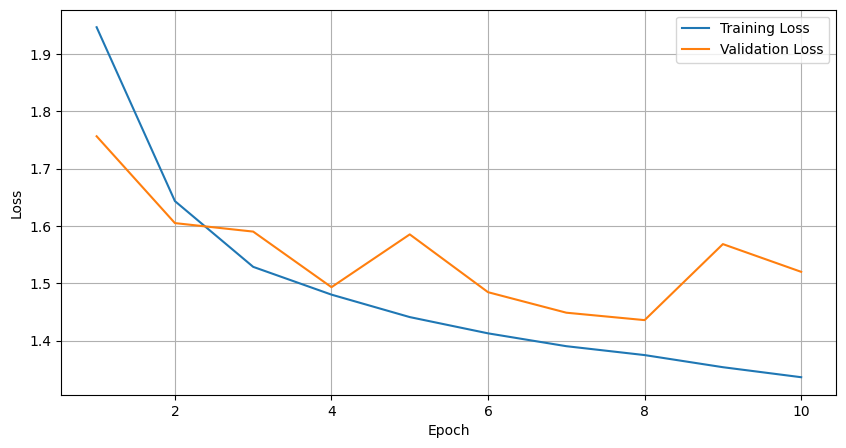

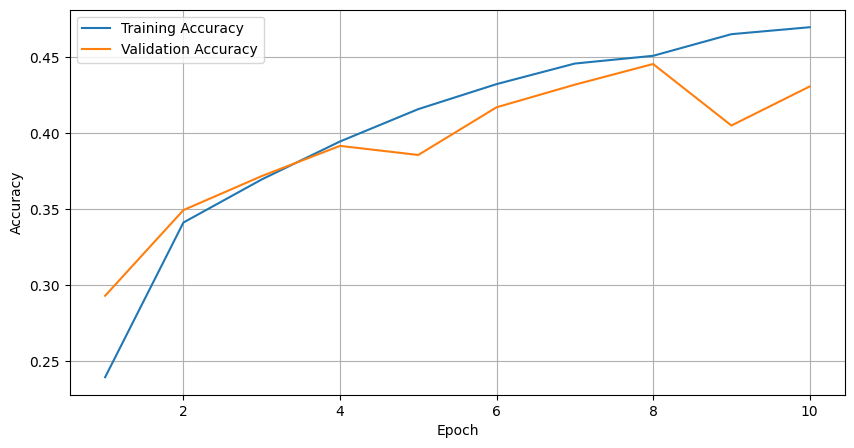

In [11]:
ctrl.eval_plot_loss_curves(which='both')
ctrl.eval_plot_accuracy_curves(which='both')

Next, plot a scatter plot of the learned latent features.

Computing features...
Done.


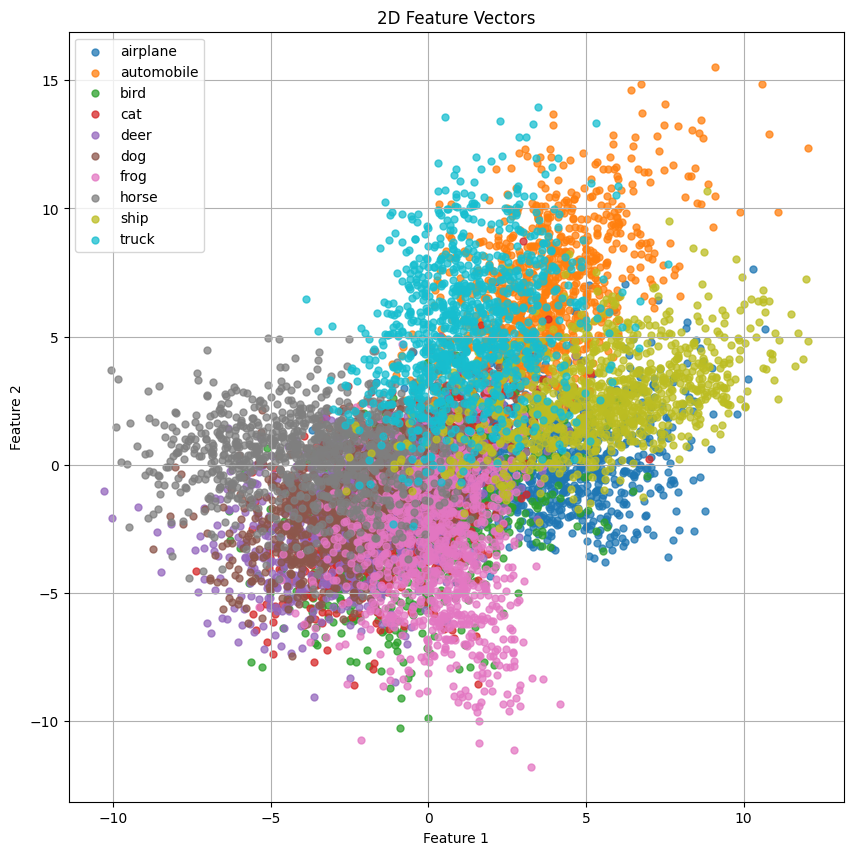

In [12]:
legend = ["airplane","automobile","bird","cat","deer", \
          "dog","frog","horse","ship","truck"]

ctrl.eval_plot_scattered_features(
    which='validation',
    legend=legend
)